In [1]:
import cv2
# used for accessing url to download files
import urllib.request as urlreq

# used to access local directory
import os

# used to plot our images
import matplotlib.pyplot as plt

# used to change image size
from pylab import rcParams

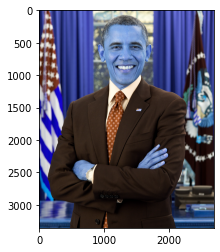

In [2]:
# show original Obama image
# save picture's url in pics_url variable
pics_url = "https://upload.wikimedia.org/wikipedia/commons/8/8d/President_Barack_Obama.jpg"

# save picture's name as pic
pic = "image.jpg"

# download picture from url and save locally as image.jpg
urlreq.urlretrieve(pics_url, pic)

# read image with openCV
image = cv2.imread(pic)

# plot image with matplotlib package
plt.imshow(image)

In [3]:
# SETUP BOUNDING BOX DETECTION

# save face detection algorithm's url in haarcascade_url variable
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

# save face detection algorithm's name as haarcascade
haarcascade = "haarcascade_frontalface_alt2.xml"

# chech if file is in working directory
if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    # download file from url and save locally as haarcascade_frontalface_alt2.xml, < 1MB
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")

# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

File exists


In [4]:
# SETUP LANDMARK DETECTION
# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "lbfmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    # download picture from url and save locally as lbfmodel.yaml, < 54MB
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

# create an instance of the Facial landmark Detector with the model
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

File exists


In [5]:
# Make a function to draw bounding box and landmarks
def draw_image(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # draw bounding box
    # Detect faces using the haarcascade classifier on the "grayscale image"
    faces = detector.detectMultiScale(image_gray)

    # Print coordinates of detected faces
    # print("Faces:\n", faces)

    for face in faces:
        #save the coordinates in x, y, w, d variables
        (x,y,w,d) = face
        # Draw a white coloured rectangle around each face using the face's coordinates
        # on the "image_template" with the thickness of 2 
        cv2.rectangle(image,(x,y),(x+w, y+d),(255, 255, 255), 2)

    # draw landmarks
    _, landmarks = landmark_detector.fit(image_gray, faces)
    for landmark in landmarks:
        for x,y in landmark[0]:
            # display landmarks on "image_cropped"
            # with white colour in BGR and thickness 1
            cv2.circle(image, (int(x), int(y)), 2, (0, 255, 0), 2)
    return image

In [6]:
# pass in the Obama image to the function
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
obama_image_annotated = draw_image(image)

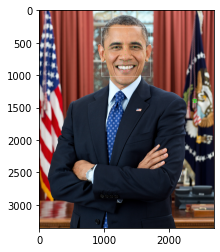

In [7]:
# show the new Obama image
plt.imshow(obama_image_annotated)

In [8]:
vid = cv2.VideoCapture(0)

In [9]:
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    
    # send to function to draw landmarks and box
    draw_on = draw_image(frame)
    
    # Display the resulting frame
    cv2.imshow('frame', draw_on)
    
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        vid.release()
        # Destroy all the windows
        cv2.destroyAllWindows()
        cv2.waitKey(1)    
        break